<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [37]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
df = pd.read_csv('./data/job_listings.csv')
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [38]:
descript = []
for text in df['description']:
    soup = BeautifulSoup(text, 'html.parser')
    descript.append(soup.get_text())
df['description'] = descript
df.head()

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [29]:
##### Your Code Here #####
nlp = spacy.load("en_core_web_lg")

In [40]:
lemma = []
for text in df['description']:
    doc = nlp(text)
    lemma.append([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])
df['lemma'] = lemma
df.head()

,Unnamed: 0,description,title,lemma
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist,"[b""Job, requirements:\nconceptual, understandi..."
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I,"[b'Job, description\n\na, Data, scientist, 1, ..."
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level,"[b'As, Data, scientist, work, consult, busines..."
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,"[b'$4,969, $, 6,756, monthcontractunder, gener..."
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist,"[b'Location, USA, \xe2\x80\x93, multiple, loca..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [43]:
##### Your Code Here #####
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = df['description']

# create the transformer
vect = CountVectorizer()

# build vocab
vect.fit(text)

# transform text
dtm = vect.transform(text)

In [44]:
type(dtm.todense())

numpy.matrix

In [45]:
print(vect.get_feature_names())

['00', '000', '02115', '03', '0356', '04', '062', '06366', '08', '10', '100', '1000', '1001', '1008', '100k', '100x', '105', '1079302', '1082692', '10b', '10ms', '10x', '11', '110k', '112', '114157802', '12', '120', '125', '126', '130', '1315', '1324b', '138', '14', '140', '15', '150', '15000', '159m', '16', '1605', '165', '169334br', '17', '170', '17b', '18', '180', '180008jq', '18b', '19', '190', '190007ji', '19000bn4', '19000c1k', '19004162', '1901744', '1904', '1904labs', '1905', '19050', '1938', '1944', '1967', '1971', '1975', '1979', '1988', '199', '1994', '1999', '1b', '1st', '1strategy', '1tb', '20', '200', '2000', '200020183', '200041695', '2004', '2008', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2050', '21', '210', '2145', '2272', '24', '24m', '25', '250', '25256', '26', '260', '27', '28', '2nd', '2x', '30', '300', '30328', '30bn', '30k', '31', '317', '320', '3201', '33', '33051', '338', '35', '350', '3535', '35million', '36', '360', '36

In [46]:
text[:25]

0     b"Job Requirements:\nConceptual understanding ...
1     b'Job Description\n\nAs a Data Scientist 1, yo...
2     b'As a Data Scientist you will be working on c...
3     b'$4,969 - $6,756 a monthContractUnder the gen...
4     b'Location: USA \xe2\x80\x93 multiple location...
5     b'Create various Business Intelligence Analyti...
6     b'As Spotify Premium swells to over 96M subscr...
7     b"Everytown for Gun Safety, the nation's large...
8     b"MS in a quantitative discipline such as Stat...
9     b'Slack is hiring experienced data scientists ...
10    b'Who We Are\nBlackThorn Therapeutics is a com...
11    b'Part-timeAbout The Opportunity\nHere at Grub...
12    b"nfosys\xe2\x80\x93 Data & Analytics \xe2\x80...
13    b'As Spotify Premium swells to over 96M subscr...
14    b'Experience with guiding R&D strategy for you...
15    b'The Atlantic is seeking a Data Scientist to ...
16    b'THE CHALLENGE\nEventbrite is big, bustling m...
17    b'ContractWe are looking to hire for a Dat

In [47]:
print(dtm)

  (0, 225)	1
  (0, 498)	1
  (0, 569)	2
  (0, 608)	2
  (0, 661)	1
  (0, 675)	1
  (0, 697)	1
  (0, 755)	1
  (0, 914)	1
  (0, 1071)	1
  (0, 1472)	1
  (0, 1528)	1
  (0, 1612)	1
  (0, 1689)	1
  (0, 2071)	1
  (0, 2132)	1
  (0, 2167)	1
  (0, 2482)	1
  (0, 2616)	1
  (0, 2848)	1
  (0, 2960)	2
  (0, 2977)	1
  (0, 3133)	1
  (0, 3160)	1
  (0, 3249)	1
  :	:
  (425, 9654)	1
  (425, 9690)	1
  (425, 9711)	1
  (425, 9759)	1
  (425, 9783)	2
  (425, 9820)	1
  (425, 9826)	1
  (425, 9828)	1
  (425, 9834)	2
  (425, 9847)	3
  (425, 9849)	1
  (425, 9863)	10
  (425, 9865)	2
  (425, 9866)	1
  (425, 9876)	6
  (425, 9882)	1
  (425, 9885)	1
  (425, 9888)	1
  (425, 9911)	5
  (425, 9924)	2
  (425, 9960)	3
  (425, 10028)	5
  (425, 10041)	2
  (425, 10052)	3
  (425, 10054)	1


In [48]:
# Dealing with Sparse Matrix
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [50]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
data = df['description']
data[0][:25]

'b"Job Requirements:\\nConc'

In [53]:
len(data)

426

## 4) Visualize the most common word counts

In [86]:
##### Your Code Here #####
dtm.sum().sort_values(ascending=False)[:50]

and            11737
to              6913
the             5300
of              4611
data            4394
in              3594
with            3059
for             2059
or              1936
you             1505
our             1484
is              1447
we              1422
xe2             1417
x80             1404
will            1315
experience      1238
on              1199
business        1198
as              1180
that            1031
are             1007
work             976
team             972
science          956
be               948
learning         912
an               855
analytics        730
machine          686
analysis         675
skills           673
from             658
at               640
nexperience      616
models           614
have             591
product          578
statistical      566
x99s             564
by               543
solutions        530
new              527
this             522
scientist        511
other            467
insights         464
all          

<AxesSubplot:>

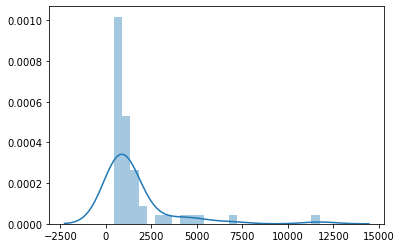

In [87]:
import seaborn as sns

sns.distplot(dtm.sum().sort_values(ascending=False)[:50])

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [88]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,04,10,100,1079302,11,12,125,14,15,...,years,yearthe,yes,yeti,york,young,yrs,zeus,zf,zillow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [90]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,$,"$ 100,000",$ 300,+,+ city,+ year,+ years\xe2\x80\x99,.\n\nabout,.\n\nabout role\n\nas,.\n\nperks\n\nhealth,...,you\xe2\x80\x99ll partner,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99re ready,you\xe2\x80\x99ve,you\xe2\x80\x99ve work,yrs,|,||
0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.026609,0.0,0.029055,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.183957,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.135861,0.0,0.148350,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
dtm.shape

(426, 10771)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [92]:
##### Your Code Here #####
dtm.head()

,$,"$ 100,000",$ 300,+,+ city,+ year,+ years\xe2\x80\x99,.\n\nabout,.\n\nabout role\n\nas,.\n\nperks\n\nhealth,...,you\xe2\x80\x99ll partner,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99re ready,you\xe2\x80\x99ve,you\xe2\x80\x99ve work,yrs,|,||
0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.026609,0.0,0.029055,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.183957,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.135861,0.0,0.148350,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [94]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.29773639, 1.30512818, 1.3315368 , 1.33613702]]),
 array([[  0, 115, 274, 403, 338]], dtype=int64))

In [95]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[256]])

(array([[0.        , 1.26297941, 1.27333379, 1.27953141, 1.27953141]]),
 array([[256, 201, 410,  23, 123]], dtype=int64))

In [96]:
data[256][:200]

"b'Role Summary:\\nThe CCS Data Scientist is responsible for supporting the CCS digital service operations teams with data analytics that drive improved remote service efficiency and improved customer e"

In [100]:
data[121][:200]

"b'Part-timeThe Nittany Artificial Intelligence (AI) Alliance at The Pennsylvania State University (PSU) is looking for a talented and highly motivated undergraduate intern to work on AI-related projec"

In [101]:
job_description = ["""
A data science job that pays $100,000 a year. Located in Los Angeles and has a 401k plan.
"""]

In [102]:
# Query for job
new = tfidf.transform(job_description)

In [103]:
new

<1x10771 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [104]:
nn.kneighbors(new.todense())

(array([[1.17755184, 1.35518986, 1.35518986, 1.35708586, 1.35823557]]),
 array([[ 19, 207, 315, 401, 254]], dtype=int64))

In [107]:
# Inspect Most relevant result
data[19]

"b'$70,000 - $100,000 a yearTitle: Data Analyst/Jr. Data Scientist\\nLocations: Charleston, SC\\nSalary: $70-100k (dependent upon experience\\n\\nQualifications:\\n\\n2+ years of Database Development/Architecture experience (SQL)\\nExperience with Data visualization tools such as Tableau (Sisense preferred)\\nExpertise in MS Excel\\nPreferred:\\n\\nDegree in Computer Science\\nExperience with R and/or Python\\nExperience working with Spark\\nMachine Learning experience\\nA bit about the company:\\n\\nIn the A.I. space\\nGreat company culture/office environment\\nAmazing benefits\\nIndustry disruptive organization'"

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 